# CASE STUDY-BANKING

# CREDIT CARD PREDICTION

In [1]:
import pandas as pd
import numpy as np

In [2]:
credit=pd.read_excel('CREDIT CARD USERS DATA.xlsx')
credit.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 132 entries, custid to response_03
dtypes: float64(31), int64(99), object(2)
memory usage: 5.0+ MB


In [4]:
credit.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=132)

In [5]:
# Null values are represent by #null! which is a string due to which 
#variable dtypes become object replacing it with np.nan
credit=credit.replace(to_replace='#NULL!',value=np.nan)

# CREATING DEPENDENT VARIABLE

In [6]:
credit.cardspent.isnull().sum()

0

In [7]:
credit.card2spent.isnull().sum()

0

In [8]:
credit['totalspent']=credit['cardspent']+credit['card2spent']

In [9]:
credit.sample(5)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,totalspent
3486,1527-FHUVAV-FFM,3,2.0,1,54,5,January,13,2,1,...,1,1,0,1,1,1,0,0,0,281.85
1771,9036-JCWMQM-POI,3,2.0,0,64,5,December,10,1,2,...,0,0,0,0,0,1,0,0,0,478.57
2103,7637-SQZKBF-R5X,1,4.0,1,70,6,January,11,1,6,...,0,0,0,0,0,1,0,0,0,460.11
2383,9313-YQDSKI-YB3,4,5.0,1,63,5,July,17,4,6,...,0,1,0,1,0,1,0,0,0,642.72
3443,2494-PLLYQZ-KM4,4,4.0,1,66,6,November,12,2,3,...,0,1,0,0,0,1,0,0,0,1009.69


In [10]:
#dropping variables used to create dependent variable
credit.drop(columns=['cardspent','card2spent'],axis=1,inplace=True)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
sns.set(style='darkgrid')

 ## **Check the variable distribution** 

C:\Users\A\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


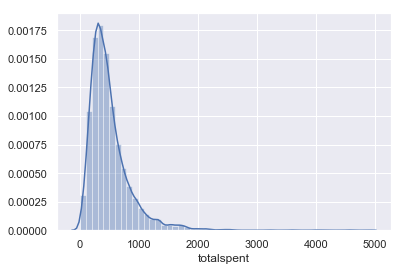

In [13]:
sns.distplot(credit.totalspent,hist=True)

**As you can see distibution is rightly skewed so we need to take log transformation**

In [14]:
credit['totalspent'].describe()

count    5000.00000
mean      498.07863
std       351.52927
min         8.11000
25%       276.28250
50%       414.25000
75%       615.56250
max      4881.05000
Name: totalspent, dtype: float64

**.** The distribution of the totalspent variable aligns with the above   statistics i.e.,the distribution is rightly skewed

**.** The median of totalspent on the credit card  is Rs. 414.25


**.** 75% of credit card have totalspent below Rs. 615.56


**.** The maximum totalspent from the credit card is Rs. 4881.05

# **New Dependent variable**

In [15]:
credit['log_total_spent']=np.log(credit['totalspent']+1)

C:\Users\A\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


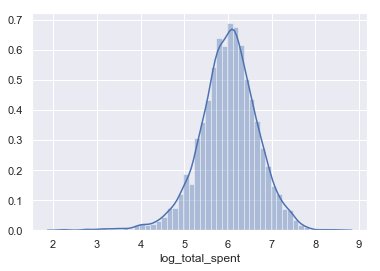

In [16]:
sns.distplot(credit['log_total_spent'],hist=True)

In [17]:
#dropping the totalspent variable from dataframe bcoz we have obtain new dependent variable
credit.drop(columns=['totalspent'],axis=1,inplace=True)

In [18]:
import pandas_profiling

C:\Users\A\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\A\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\A\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\A\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\A\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Users\A\Anaconda3\lib\site-packag

In [19]:
pandas_profiling.ProfileReport(credit)

C:\Users\A\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,131
Number of observations,5000
Total Missing (%),0.2%
Total size in memory,5.0 MiB
Average record size in memory,1.0 KiB
Numeric,60
Categorical,1
Boolean,49
Date,0
Text (Unique),1
Rejected,20


In [20]:
col=['agecat','edcat','inccat','spoused','spousedcat','addresscat','commutecat',
    'card2tenure','card2tenurecat','equipmon','longten']
credit.drop(col,axis=1,inplace=True)

In [21]:
#Imporing Data Dictionary as 'Dictionary'
dictionary=pd.read_excel('CREDIT CARD USERS DATA.xlsx','Data Dictionary')
dictionary.head()

,Numeric Variable,Label,Unnamed: 2,Categorical Variable,Unnamed: 4,Label.1
0,custid,Customer ID,NaN,region,1,Zone 1
1,region,Geographic indicator,NaN,NaN,2,Zone 2
2,townsize,Size of hometown,NaN,NaN,3,Zone 3
3,gender,Gender,NaN,NaN,4,Zone 4
4,age,Age in years,NaN,NaN,5,Zone 5


In [22]:
dict(dictionary.loc[:,'Categorical Variable'].value_counts())

{'owncd': 1,
 'callcard': 1,
 'polparty': 1,
 'carcatvalue': 1,
 'reason': 1,
 'commutemotorcycle': 1,
 'commutecat': 1,
 'card2': 1,
 'gender': 1,
 'commutecar': 1,
 'polview': 1,
 'telecommute': 1,
 'birthmonth': 1,
 'retire': 1,
 'agecat': 1,
 'commutenonmotor': 1,
 'ownvcr': 1,
 'commuterail': 1,
 'vote': 1,
 'commute': 1,
 'ownfax': 1,
 'commutebike': 1,
 'churn': 1,
 'response_03': 1,
 'edcat': 1,
 'forward': 1,
 'internet': 1,
 'jobcat': 1,
 'callid': 1,
 'cardtenure': 1,
 'multline': 1,
 'response_01': 1,
 'card2benefit': 1,
 'response_02': 1,
 'spousedcat': 1,
 'cardfee': 1,
 'card2tenure': 1,
 'news': 1,
 'bfast': 1,
 'ownipod': 1,
 'townsize': 1,
 'addresscat': 1,
 'carbuy': 1,
 'inccat': 1,
 'card': 1,
 'address': 1,
 'card2type': 1,
 'commutebus': 1,
 'cardbenefit': 1,
 'union': 1,
 'region': 1,
 'commutewalk': 1,
 'card2fee': 1,
 'homeown': 1,
 'owndvd': 1,
 'carbought': 1,
 'ownpda': 1,
 'cardtype': 1,
 'employ': 1,
 'cars': 1,
 'cartype': 1,
 'ebill': 1,
 'commutecarpoo

In [23]:
#Defining Categorical variables as cat_var
cat_var=dictionary[dictionary['Categorical Variable'].isnull()==False]['Categorical Variable']
cat_var.head()
list(cat_var)

['region',
 'townsize',
 'gender',
 'agecat',
 'birthmonth',
 'edcat',
 'jobcat',
 'union',
 'employ',
 'empcat',
 'retire',
 'inccat',
 'default',
 'jobsat',
 'marital',
 'spousedcat',
 'homeown',
 'hometype',
 'address',
 'addresscat',
 'cars',
 'carown',
 'cartype',
 'carcatvalue',
 'carbought',
 'carbuy',
 'commute',
 'commutecat',
 'commutecar',
 'commutemotorcycle',
 'commutecarpool',
 'commutebus',
 'commuterail',
 'commutepublic',
 'commutebike',
 'commutewalk',
 'commutenonmotor',
 'telecommute',
 'reason',
 'polview',
 'polparty',
 'polcontrib',
 'vote',
 'card',
 'cardtype',
 'cardbenefit',
 'cardfee',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2type',
 'card2benefit',
 'card2fee',
 'card2tenure',
 'card2tenurecat',
 'active',
 'bfast',
 'churn',
 'tollfree',
 'equip',
 'callcard',
 'wireless',
 'multline',
 'voice',
 'pager',
 'internet',
 'callid',
 'callwait',
 'forward',
 'confer',
 'ebill',
 'owntv',
 'ownvcr',
 'owndvd',
 'owncd',
 'ownpda',
 'ownpc',
 'ownipod',

In [24]:
for features in ['region','townsize','gender','birthmonth',
                 'jobcat','union', 'employ', 'empcat','retire',
                 'default', 'jobsat', 'marital', 'homeown', 
                 'hometype', 'address', 'cars', 'carown', 'cartype',
                 'carcatvalue', 'carbought', 'carbuy', 'commute', 
                 'commutecar','commutemotorcycle','commutecarpool','commutebus',
                 'commuterail', 'commutepublic', 'commutebike', 'commutewalk',
                 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty',
                 'polcontrib','vote', 'card', 'cardtype', 'cardbenefit',
                 'cardfee', 'cardtenure', 'card2', 'card2type',
                 'card2benefit', 'card2fee',
                 'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard',
                 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid',
                 'callwait', 'forward', 'confer', 'ebill', 'owntv', 'ownvcr',
                 'owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax',
                 'news', 'response_01', 'response_02', 'response_03']:
    credit[features]=credit[features].astype('object')

# **Seperating numerical & categorical variables**

In [25]:
#credit_num=credit._get_numeric_data()
credit_num=credit.select_dtypes(include=['float64','float32','int64','int32'])
credit_num.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,reside,...,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,log_total_spent
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,3,...,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,5.013697
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,2,...,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,4.363608
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,3,...,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,5.888795
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,5,...,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,5.887242
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,4,...,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,6.232114


In [26]:
credit_cat=credit.select_dtypes(include=['object'])
credit_cat.head()

,custid,region,townsize,gender,birthmonth,jobcat,union,employ,empcat,retire,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2,1,September,1,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5,0,May,2,0,0,1,0,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4,1,June,2,0,16,5,0,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3,0,May,2,0,0,1,0,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2,0,July,2,0,1,1,0,...,1,0,1,0,1,0,0,0,1,0


# **Creating Audit Report**

In [27]:
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.mean(),x.median(),x.var(),x.std(),x.min(),x.dropna().quantile(0.01),
                     x.dropna().quantile(0.05),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),x.dropna().quantile(0.99),x.max()],
                    index=['N','NMISS','MEAN','MEDIAN','VAR','STD','MIN','P1','P5','P25','P50','P75','P90','P95','P99','MAX'])

In [28]:
num_summary=credit_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,MEAN,MEDIAN,VAR,STD,MIN,P1,P5,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,47.025600,47.000000,3.157849e+02,17.770338,18.000000,18.000000,20.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,0.0,14.543000,14.000000,1.076550e+01,3.281083,6.000000,8.000000,9.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,23.000000
income,5000.0,0.0,54.759600,38.000000,3.066669e+03,55.377511,9.000000,9.000000,13.000000,24.000000,38.000000,67.000000,109.100000,147.000000,272.010000,1073.000000
lninc,5000.0,0.0,3.699909,3.637586,5.581164e-01,0.747072,2.197225,2.197225,2.564949,3.178054,3.637586,4.204693,4.692261,4.990433,5.605839,6.978214
debtinc,5000.0,0.0,9.954160,8.800000,4.095723e+01,6.399783,0.000000,0.700000,1.900000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,43.100000
creddebt,5000.0,0.0,1.857326,0.926437,1.166722e+01,3.415732,0.000000,0.033160,0.101088,0.385520,0.926437,2.063820,4.299470,6.373010,14.280358,109.072596
lncreddebt,4999.0,1.0,-0.130454,-0.076106,1.620678e+00,1.273058,-6.597334,-3.401690,-2.291604,-0.952685,-0.076106,0.724665,1.458625,1.852297,2.658910,4.692014
othdebt,5000.0,0.0,3.654460,2.098540,2.910788e+01,5.395172,0.000000,0.114299,0.287692,0.980301,2.098540,4.314780,8.062046,11.815981,24.064260,141.459150
lnothdebt,4999.0,1.0,0.696915,0.741537,1.273689e+00,1.128578,-4.092107,-2.168241,-1.243483,-0.018987,0.741537,1.462053,2.087178,2.469586,3.180802,4.952011
reside,5000.0,0.0,2.204000,2.000000,1.943173e+00,1.393977,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,9.000000


In [29]:
def cat_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.mode(),x.value_counts()],
                    index=['N','NMISS','MODE','COLUMNNAMES'])

In [30]:
cat1_summary=credit_cat.apply(lambda x: cat_summary(x)).T
cat1_summary

,N,NMISS,MODE,COLUMNNAMES
custid,5000,0,0 0002-GTOKLU-YVY 1 0003-RLTRGE-IW...,7476-JNHWIW-QIV 1 8138-BMCTXB-B2A 1 9156...
region,5000,0,0 5 dtype: object,5 1027 1 1009 3 1003 2 995 4 ...
townsize,4998,2,0 1 dtype: object,1.0 1436 2.0 1048 3.0 907 4.0 85...
gender,5000,0,0 1 dtype: object,"1 2518 0 2482 Name: gender, dtype: int64"
birthmonth,5000,0,0 September dtype: object,September 458 May 451 June ...
jobcat,5000,0,0 2 dtype: object,2 1640 1 1388 6 688 3 620 5 ...
union,5000,0,0 0 dtype: object,"0 4244 1 756 Name: union, dtype: int64"
employ,5000,0,0 0 dtype: object,0 659 1 389 2 318 3 309 4 ...
empcat,5000,0,0 2 dtype: object,2 1180 5 1135 1 1048 3 968 4 ...
retire,5000,0,0 0 dtype: object,"0 4262 1 738 Name: retire, dtype: int64"


In [31]:
allcolumn=[]
for i in credit_cat.columns:
    allcolumn.append(i)

In [32]:
ln_start=credit_cat.columns.str.startswith('ln')
ln_start1=np.array(allcolumn)
data=ln_start1[ln_start]
data

array([], dtype='<U17')

In [33]:
allcolumn1=[]
for i in credit_num.columns:
    allcolumn1.append(i)

In [34]:
ln_start0=credit_num.columns.str.startswith('ln')
ln_start2=np.array(allcolumn1)
ln_start2
#data1

array(['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt',
       'lncreddebt', 'othdebt', 'lnothdebt', 'reside', 'pets',
       'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles',
       'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue',
       'commutetime', 'cardtenurecat', 'carditems', 'card2items',
       'tenure', 'longmon', 'lnlongmon', 'lnlongten', 'tollmon',
       'lntollmon', 'tollten', 'lntollten', 'lnequipmon', 'equipten',
       'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten',
       'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv',
       'log_total_spent'], dtype='<U15')

In [35]:
#Remove duplicate features like log variables, categorical features which are having numerical features.
#carditems,card2items directly proportional to spent
credit_num.drop(columns=['lncreddebt','lnothdebt','lninc','lnlongmon','lnlongten','card2items','carditems'],axis=1,inplace=True)

C:\Users\A\Anaconda3\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
# Dropping custid & birthmonth are not helping in analyzing
credit_cat.drop(['custid','birthmonth'],axis=1,inplace=True)

C:\Users\A\Anaconda3\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
len(credit_num.columns)

37

In [38]:
len(credit_cat.columns)

74

# **Missing Value Treatment**

In [39]:
(credit_num.isnull().sum().sort_values(ascending=False))*100/len(credit_num)

lnwireten          73.12
lnwiremon          73.12
lnequipten         65.92
lnequipmon         65.92
lntollten          52.44
lntollmon          52.44
lncardten          28.44
lncardmon          28.38
commutetime         0.04
cardten             0.04
log_total_spent     0.00
reside              0.00
pets_birds          0.00
pets_dogs           0.00
pets_cats           0.00
pets                0.00
creddebt            0.00
othdebt             0.00
pets_small          0.00
debtinc             0.00
income              0.00
ed                  0.00
pets_reptiles       0.00
tenure              0.00
pets_saltfish       0.00
pets_freshfish      0.00
carvalue            0.00
cardtenurecat       0.00
hourstv             0.00
longmon             0.00
tollmon             0.00
tollten             0.00
equipten            0.00
cardmon             0.00
wiremon             0.00
wireten             0.00
age                 0.00
dtype: float64

In [40]:
credit_cat.isnull().sum().sort_values(ascending=False)

townsize       2
response_03    0
commutebike    0
commute        0
commutecar     0
              ..
equip          0
callcard       0
wireless       0
multline       0
region         0
Length: 74, dtype: int64

In [41]:
credit_num.drop(columns=['lnwiremon','lnwireten','lnequipten','lnequipmon','lntollmon','lntollten','lncardten','lncardmon'],axis=1,inplace=True)

C:\Users\A\Anaconda3\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
#For numeric variables
def missing_imputation(x):
    x=x.fillna(x.mean())
    return x

In [43]:
credit_num=credit_num.apply(lambda x: missing_imputation(x))

In [44]:
#For categorical variables
def missing1_imputation(x):
    x=x.fillna(x.value_counts().index[0])
    return x

In [45]:
credit_cat=credit_cat.apply(lambda x: missing1_imputation(x))

In [46]:
credit_num.isnull().sum().values.sum()

0

In [47]:
credit_cat.isnull().sum().values.sum()

0

In [48]:
credit_cat.isnull().sum().values.sum()

0

# **Outlier Treatment**

In [49]:
def outlier_treatment(x):
    x=x.clip_upper(x.quantile(0.99))
    x=x.clip_lower(x.quantile(0.01))
    return x 

In [50]:
credit_num=credit_num.apply(lambda x: outlier_treatment(x))

C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


# **Creating Dummies for categorical variables**

In [51]:
def create_dummies(df,colname):
    col_dummies=pd.get_dummies(df[colname],prefix=colname)
    col_dummies.drop(col_dummies.columns[0],axis=1,inplace=True)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

In [52]:
#boolean variables doesn't required dummie creation, so doing for non-boolean variable
cat_variables=['region','townsize','jobcat','employ','empcat','jobsat','hometype','address',
'cars','carcatvalue','carbought','commute','reason','polview','card','cardtype',
'cardbenefit','cardtenure','card2','card2type','bfast','internet']

In [53]:
#cat_variables=list(credit_cat.columns)

In [54]:
for i in cat_variables:
    credit_cat[i]=credit_cat[i].astype('category')
    credit_cat=create_dummies(credit_cat,i)

In [55]:
credit_cat.head()

,gender,union,retire,default,marital,homeown,carown,cartype,carbuy,commutecar,...,card2_5,card2type_2,card2type_3,card2type_4,bfast_2,bfast_3,internet_1,internet_2,internet_3,internet_4
0,1,1,0,1,0,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,0,0,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0


# Merging numerical and categorical data

In [56]:
credit_new=pd.concat([credit_num,credit_cat],axis=1)
credit_new.head()

,age,ed,income,debtinc,creddebt,othdebt,reside,pets,pets_cats,pets_dogs,...,card2_5,card2type_2,card2type_3,card2type_4,bfast_2,bfast_3,internet_1,internet_2,internet_3,internet_4
0,20,15,31.0,11.1,1.200909,2.240091,3,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,22,17,15.0,18.6,1.222020,1.567980,2,6,0,0,...,0,0,0,0,0,0,0,0,0,1
2,67,14,35.0,9.9,0.928620,2.536380,3,3,2,1,...,0,0,0,0,0,1,0,0,0,0
3,23,16,20.0,5.7,0.033160,1.117200,5,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,26,16,23.0,1.7,0.214659,0.176341,4,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [57]:
credit_new.shape

(5000, 307)

# **Spliting data into train & test data**

In [58]:
feature_columns=credit_new.columns.difference(['log_total_spent'])
feature_columns

Index(['active', 'address_1', 'address_10', 'address_11', 'address_12',
       'address_13', 'address_14', 'address_15', 'address_16', 'address_17',
       ...
       'townsize_2.0', 'townsize_3.0', 'townsize_4.0', 'townsize_5.0', 'union',
       'voice', 'vote', 'wireless', 'wiremon', 'wireten'],
      dtype='object', length=306)

In [59]:
from sklearn.cross_validation import train_test_split
train_X,test_X,train_y,test_y = train_test_split(credit_new[feature_columns],
                                                 credit_new['log_total_spent'],
                                                test_size=0.3,random_state=123)

C:\Users\A\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [60]:
print(len(train_X))
print(len(test_X))

3500
1500


# **Feature selection or variable reduction using random forest**

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

C:\Users\A\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [62]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [63]:
param_grid={'n_estimators':np.arange(10,25)}

In [64]:
tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2)

In [65]:
# fit the model
tree.fit(train_X,train_y)

GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
tree.best_params_

{'n_estimators': 24}

In [67]:
# we can take n_estim
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=24)
radm_clf.fit(train_X, train_y)

C:\Users\A\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=24, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [68]:
radm_clf.oob_score_

0.11494477820155269

In [69]:
from sklearn import metrics

In [70]:
feature_rank=pd.DataFrame(radm_clf.feature_importances_, index=train_X.columns, columns={'Coefficients' : 0})
feature_rank.sort_values('Coefficients',ascending=False,inplace=True)
feature_rank

,Coefficients
income,2.040574e-01
creddebt,3.117165e-02
othdebt,2.719497e-02
carvalue,2.516677e-02
card_3,2.457090e-02
debtinc,2.291944e-02
cardmon,2.117359e-02
longmon,2.111825e-02
age,2.024228e-02
hourstv,1.975148e-02


In [71]:
#Select features and then convert it into list
x=list(feature_rank.index[0:40])
print(x)

['income', 'creddebt', 'othdebt', 'carvalue', 'card_3', 'debtinc', 'cardmon', 'longmon', 'age', 'hourstv', 'commutetime', 'reason_2', 'card_4', 'tenure', 'card_2', 'ed', 'cardten', 'equipten', 'pets', 'tollmon', 'card2benefit', 'reside', 'tollten', 'card2_2', 'card2_3', 'card_5', 'pets_freshfish', 'pets_cats', 'wireten', 'pets_dogs', 'gender', 'wiremon', 'cartype', 'card2_4', 'cars_2', 'cardtenure_23', 'polview_4', 'vote', 'carbuy', 'homeown']


In [72]:
#creating dataframe from selected features:
new_features=['income', 'creddebt', 'othdebt', 'carvalue', 'card_3', 'debtinc', 
              'cardmon', 'longmon', 'age', 'hourstv', 'commutetime', 'reason_2', 
              'card_4', 'tenure', 'card_2', 'ed', 'cardten', 'equipten', 'pets', 
              'tollmon', 'card2benefit', 'reside', 'tollten', 'card2_2',
              'card2_3', 'card_5', 'pets_freshfish', 'pets_cats', 'wireten',
              'pets_dogs', 'gender', 'wiremon', 'cartype', 'card2_4', 'cars_2',
              'cardtenure_23', 'polview_4', 'vote', 'carbuy', 'homeown']


In [73]:
len(new_features)

40

In [74]:
new_features.append('log_total_spent')
df=credit_new[new_features]

In [75]:
df.head()

,income,creddebt,othdebt,carvalue,card_3,debtinc,cardmon,longmon,age,hourstv,...,wiremon,cartype,card2_4,cars_2,cardtenure_23,polview_4,vote,carbuy,homeown,log_total_spent
0,31.0,1.200909,2.240091,14.3,1,11.1,14.25,6.50,20,13,...,0.00,0,0,1,0,0,1,0,0,5.013697
1,15.0,1.222020,1.567980,6.8,0,18.6,16.00,8.90,22,18,...,45.65,1,1,1,0,1,0,0,1,4.363608
2,35.0,0.928620,2.536380,18.8,0,9.9,23.00,28.40,67,21,...,0.00,1,1,0,0,0,0,1,1,5.888795
3,20.0,0.033160,1.117200,8.7,0,5.7,21.00,6.00,23,26,...,0.00,1,0,0,0,0,0,1,1,5.887242
4,23.0,0.214659,0.176341,10.6,0,1.7,17.25,3.05,26,27,...,19.05,1,0,0,0,1,0,1,0,6.232114


# **Multicollinearity**

In [76]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [77]:
#deleting last features i.e.,log_total_spent
del new_features[-1]

In [78]:
%%capture
#together features
features= "+".join(new_features)

In [79]:
y, X = dmatrices('log_total_spent~' + features,data=df, return_type='dataframe')

In [80]:
# Calculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [81]:
vif.sort_values(by=['VIF Factor'],ascending=False)


,VIF Factor,features
0,113.062840,Intercept
19,13.278150,pets
27,11.828701,pets_freshfish
23,11.153341,tollten
17,10.035387,cardten
20,9.769151,tollmon
29,7.883267,wireten
32,7.281642,wiremon
1,7.275919,income
7,6.516713,cardmon


In [82]:
vif1=vif[vif['VIF Factor']>10].reset_index().loc[:,['features']]
vif1.drop([0],axis=0,inplace=True)
drop_vars= vif1["features"].tolist()
drop_vars


['cardten', 'pets', 'tollten', 'pets_freshfish']

In [83]:
df.drop(drop_vars,axis=1,inplace=True)

C:\Users\A\Anaconda3\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [84]:
df.shape

(5000, 37)

## Check 3 - All x variables should have a linear relationship with Y

C:\Users\A\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


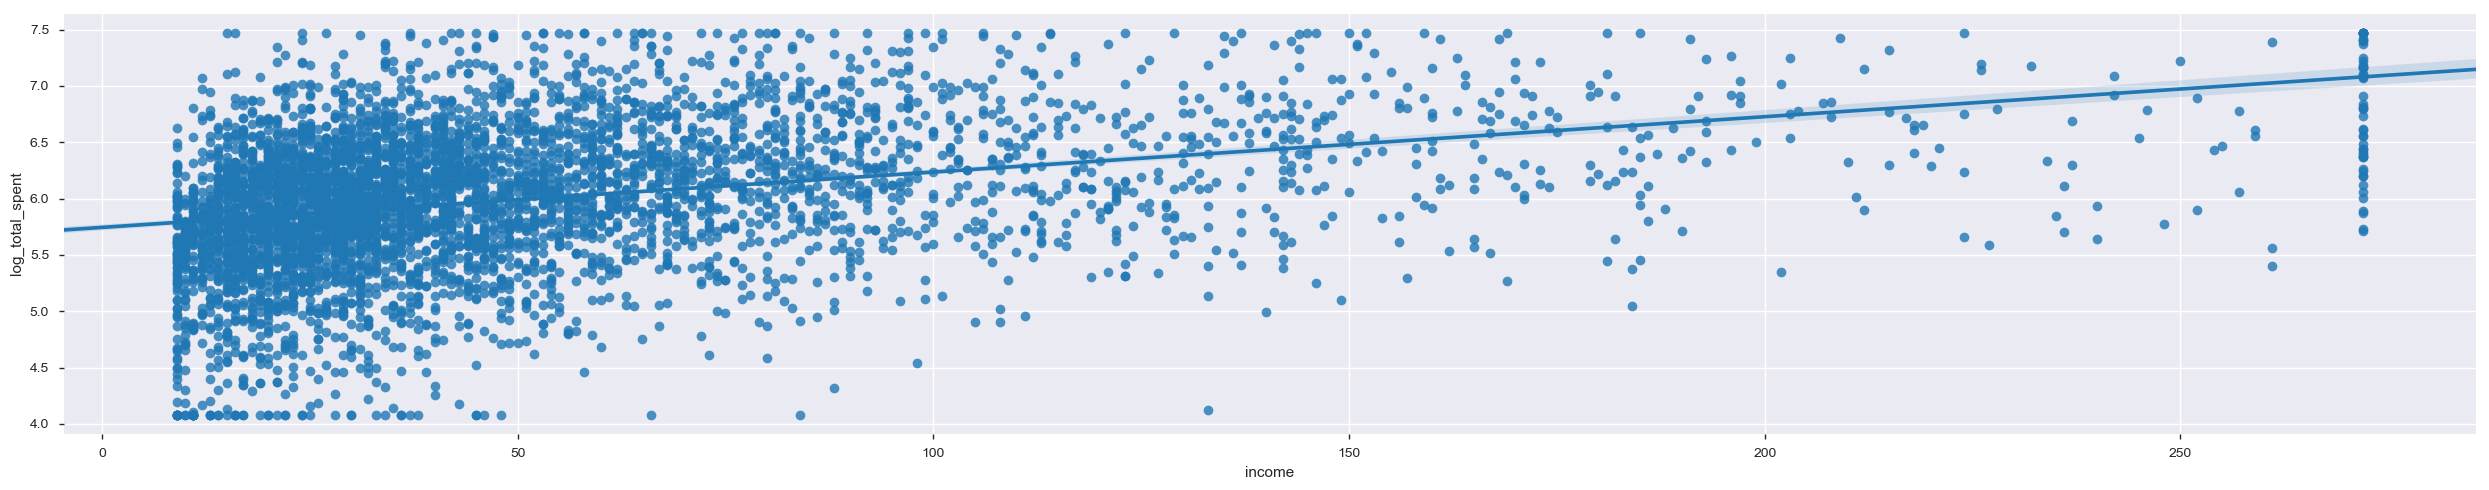

In [85]:
sns.lmplot(x="income",y="log_total_spent",data=df,aspect=5,scatter_kws={'alpha':0.8})

# Spliting data into train and test data

In [86]:
feature_column=df.columns.difference(['log_total_spent'])
feature_column

Index(['age', 'carbuy', 'card2_2', 'card2_3', 'card2_4', 'card2benefit',
       'card_2', 'card_3', 'card_4', 'card_5', 'cardmon', 'cardtenure_23',
       'cars_2', 'cartype', 'carvalue', 'commutetime', 'creddebt', 'debtinc',
       'ed', 'equipten', 'gender', 'homeown', 'hourstv', 'income', 'longmon',
       'othdebt', 'pets_cats', 'pets_dogs', 'polview_4', 'reason_2', 'reside',
       'tenure', 'tollmon', 'vote', 'wiremon', 'wireten'],
      dtype='object')

In [87]:
from sklearn.cross_validation import train_test_split
train_X,test_X,train_y,test_y = train_test_split(df[feature_column],
                                                 df['log_total_spent'],
                                                test_size=0.3,random_state=120)

# Building Regression model using statsmodels.api

In [88]:
import statsmodels.api as sm

C:\Users\A\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [89]:
train_X=sm.add_constant(train_X)
test_X=sm.add_constant(test_X)
lm=sm.OLS(train_y,train_X).fit()

C:\Users\A\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [90]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_total_spent   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     41.75
Date:                Sun, 09 Aug 2020   Prob (F-statistic):          4.38e-240
Time:                        16:39:01   Log-Likelihood:                -2814.4
No. Observations:                3500   AIC:                             5703.
Df Residuals:                    3463   BIC:                             5931.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.4912      0.097     67.195      0.000       6.302       6.681
age              -0.0023      0.001     -3.277      0.001      -0.004      -0.001
carbuy            0.0294      0.019      1.523      0.128      -0.008       0.067
card2_2          -0.3308      0.028    -11.961      0.000      -0.385      -0.277
card2_3          -0.3161      0.027    -11.627      0.000      -0.369      -0.263
card2_4          -0.3046      0.030    -10.300      0.000      -0.363      -0.247
card2benefit     -0.0068      0.008     -0.817      0.414      -0.023       0.010
card_2           -0.5749      0.030    -19.352      0.000      -0.633      -0.517
card_3           -0.5691      0.030    -19.097      0.000      -0.628      -0.511
card_4           -0.6415      0.030    -21.411      0.000      -0.700      -0.583
card_5           -0.4910      0.050     -9.760      0.000      -0.590      -0.392
cardmon          -0.0008      0.001     -1.035      0.301      -0.002       0.001
cardtenure_23    -0.1301      0.067     -1.929      0.054      -0.262       0.002
cars_2            0.0147      0.020      0.728      0.467      -0.025       0.054
cartype          -0.0213      0.016     -1.319      0.187      -0.053       0.010
carvalue          0.0014      0.001      1.560      0.119      -0.000       0.003
commutetime      -0.0005      0.002     -0.340      0.734      -0.004       0.003
creddebt          0.0051      0.006      0.842      0.400      -0.007       0.017
debtinc          -0.0003      0.002     -0.103      0.918      -0.005       0.005
ed                0.0002      0.003      0.056      0.955      -0.006       0.007
equipten        1.86e-05   1.41e-05      1.317      0.188   -9.08e-06    4.63e-05
gender           -0.0623      0.019     -3.361      0.001      -0.099      -0.026
homeown           0.0165      0.020      0.841      0.401      -0.022       0.055
hourstv           0.0049      0.002      2.698      0.007       0.001       0.008
income            0.0037      0.001      7.221      0.000       0.003       0.005
longmon           0.0002      0.001      0.134      0.893      -0.002       0.002
othdebt           0.0045      0.004      1.017      0.309      -0.004       0.013
pets_cats         0.0030      0.011      0.271      0.787      -0.019       0.025
pets_dogs        -0.0045      0.012     -0.372      0.710      -0.028       0.019
polview_4        -0.0081      0.020     -0.413      0.680      -0.047       0.030
reason_2          0.2610      0.037      7.110      0.000       0.189       0.333
reside            0.0045      0.007      0.609      0.543      -0.010       0.019
tenure            0.0005      0.001      0.626      0.531      -0.001       0.002
tollmon           0.0004      0.001      0.570      0.569      -0.001       0.002
vote             -0.0034      0.019     -0.182   

In [91]:
lm.pvalues.sort_values(ascending=False)

ed               9.549871e-01
debtinc          9.176268e-01
longmon          8.933281e-01
wiremon          8.767469e-01
vote             8.557549e-01
pets_cats        7.865479e-01
wireten          7.541031e-01
commutetime      7.340307e-01
pets_dogs        7.098548e-01
polview_4        6.798432e-01
tollmon          5.688316e-01
reside           5.426855e-01
tenure           5.312845e-01
cars_2           4.665304e-01
card2benefit     4.139522e-01
homeown          4.006069e-01
creddebt         3.996702e-01
othdebt          3.093865e-01
cardmon          3.006280e-01
equipten         1.878145e-01
cartype          1.873306e-01
carbuy           1.277871e-01
carvalue         1.187917e-01
cardtenure_23    5.375775e-02
hourstv          7.001544e-03
age              1.059109e-03
gender           7.847578e-04
reason_2         1.401885e-12
income           6.314355e-13
card_5           3.220732e-22
card2_4          1.578722e-24
card2_3          1.107924e-30
card2_2          2.456811e-32
card_3    

In [92]:
lm.pvalues.sort_values(ascending=False).keys()

Index(['ed', 'debtinc', 'longmon', 'wiremon', 'vote', 'pets_cats', 'wireten',
       'commutetime', 'pets_dogs', 'polview_4', 'tollmon', 'reside', 'tenure',
       'cars_2', 'card2benefit', 'homeown', 'creddebt', 'othdebt', 'cardmon',
       'equipten', 'cartype', 'carbuy', 'carvalue', 'cardtenure_23', 'hourstv',
       'age', 'gender', 'reason_2', 'income', 'card_5', 'card2_4', 'card2_3',
       'card2_2', 'card_3', 'card_2', 'card_4', 'const'],
      dtype='object')

# Creating final basetable with 15 variables only

****Given the factors, predict credit limit for the new applicants****

In [93]:
# Selecting those variables which have p-values lower than 5%
variable=['carbuy', 'carvalue', 'cardtenure_23', 'hourstv',
       'age', 'gender', 'reason_2', 'income', 'card_5', 'card2_4', 'card2_3',
       'card2_2', 'card_3', 'card_2', 'card_4','log_total_spent']

In [94]:
customer=df[variable]
customer.head()

,carbuy,carvalue,cardtenure_23,hourstv,age,gender,reason_2,income,card_5,card2_4,card2_3,card2_2,card_3,card_2,card_4,log_total_spent
0,0,14.3,0,13,20,1,0,31.0,0,0,0,0,1,0,0,5.013697
1,0,6.8,0,18,22,0,0,15.0,0,1,0,0,0,1,0,4.363608
2,1,18.8,0,21,67,1,1,35.0,0,1,0,0,0,1,0,5.888795
3,1,8.7,0,26,23,0,0,20.0,0,0,1,0,0,1,0,5.887242
4,1,10.6,0,27,26,0,0,23.0,0,0,0,0,0,0,1,6.232114


# Splitting data into train & test data

In [95]:
feature_column1=customer.columns.difference(['log_total_spent'])
feature_column1

Index(['age', 'carbuy', 'card2_2', 'card2_3', 'card2_4', 'card_2', 'card_3',
       'card_4', 'card_5', 'cardtenure_23', 'carvalue', 'gender', 'hourstv',
       'income', 'reason_2'],
      dtype='object')

In [96]:
from sklearn.cross_validation import train_test_split
train_X,test_X,train_y,test_y = train_test_split(customer[feature_column1],
                                                 customer['log_total_spent'],
                                                test_size=0.3,random_state=120)

In [97]:
import statsmodels.api as sm

In [98]:
train_X=sm.add_constant(train_X)
test_X=sm.add_constant(test_X)
lm1=sm.OLS(train_y,train_X).fit()

C:\Users\A\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [99]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_total_spent   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     99.56
Date:                Sun, 09 Aug 2020   Prob (F-statistic):          3.38e-256
Time:                        16:40:50   Log-Likelihood:                -2821.0
No. Observations:                3500   AIC:                             5674.
Df Residuals:                    3484   BIC:                             5772.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.4813      0.054    120.311      0.000       6.376       6.587
age              -0.0022      0.001     -4.119      0.000      -0.003      -0.001
carbuy            0.0301      0.019      1.563      0.118      -0.008       0.068
card2_2          -0.3297      0.028    -11.964      0.000      -0.384      -0.276
card2_3          -0.3156      0.027    -11.659      0.000      -0.369      -0.263
card2_4          -0.3028      0.029    -10.296      0.000      -0.360      -0.245
card_2           -0.5793      0.029    -19.746      0.000      -0.637      -0.522
card_3           -0.5732      0.029    -19.458      0.000      -0.631      -0.515
card_4           -0.6427      0.030    -21.581      0.000      -0.701      -0.584
card_5           -0.4982      0.050    -10.044      0.000      -0.595      -0.401
cardtenure_23    -0.1136      0.067     -1.702      0.089      -0.244       0.017
carvalue          0.0010      0.001      1.258      0.208      -0.001       0.003
gender           -0.0624      0.018     -3.382      0.001      -0.099      -0.026
hourstv           0.0050      0.002      2.783      0.005       0.001       0.009
income            0.0044      0.000     12.289      0.000       0.004       0.005
reason_2          0.2592      0.037      7.097      0.000       0.188       0.331
==============================================================================
Omnibus:                       56.629   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.112
Skew:                          -0.308   Prob(JB):                     1.46e-13
Kurtosis:                       3.160   Cond. No.                         647.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
print('Parameters:', lm1.params)
print('R2:', lm1.rsquared)

Parameters: const            6.481311
age             -0.002184
carbuy           0.030080
card2_2         -0.329700
card2_3         -0.315631
card2_4         -0.302783
card_2          -0.579316
card_3          -0.573153
card_4          -0.642689
card_5          -0.498156
cardtenure_23   -0.113588
carvalue         0.000993
gender          -0.062448
hourstv          0.004990
income           0.004392
reason_2         0.259170
dtype: float64
R2: 0.3000347949350438


# Model Accuracy

In [101]:
test_pred=lm1.predict(test_X)
train_pred=lm1.predict(train_X)

from sklearn import metrics

print('MSE Test:',metrics.mean_squared_error(test_y,test_pred))
print('MSE Train:',metrics.mean_squared_error(train_y,train_pred))


MSE Test: 0.2796664764182947
MSE Train: 0.2934922351569274


In [102]:
print ('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print ('MSE:', metrics.mean_squared_error(test_y, test_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 0.4128709864788038
MSE: 0.2796664764182947
RMSE: 0.5288350181467701


# Check Normality and Residuals

**We will use Q-Q plot to examine this**

C:\Users\A\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


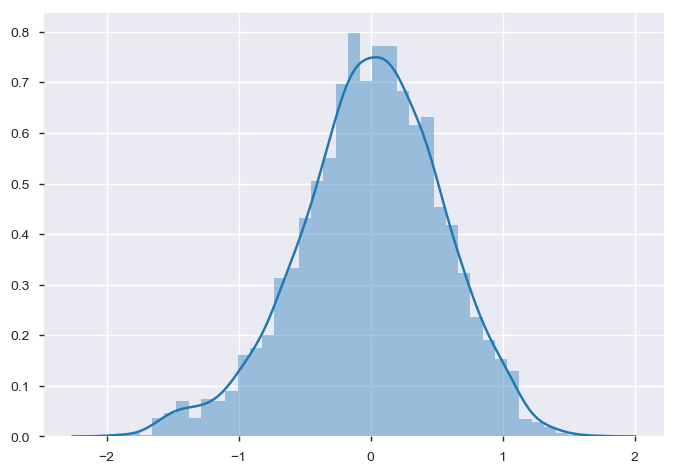

In [103]:
residuals=train_y-train_pred

import seaborn as sns

sns.distplot(residuals)

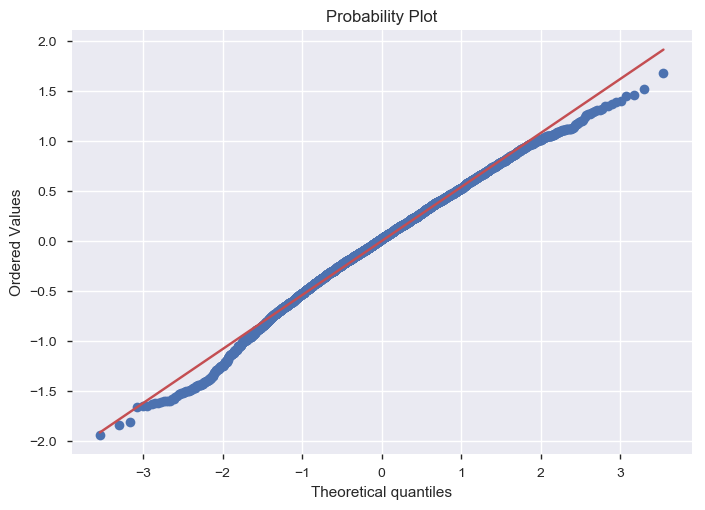

In [104]:
from scipy import stats
import pylab

stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()


**From the above histogram and Q-Q plot, shows that the residuals are normally distributed, so our assumption is not violated**

# Predicting sales:

**We are going to credit card sales on Testing data**

In [105]:
customer=customer[feature_column1]

customer=sm.add_constant(customer)

customer.head()


C:\Users\A\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,age,carbuy,card2_2,card2_3,card2_4,card_2,card_3,card_4,card_5,cardtenure_23,carvalue,gender,hourstv,income,reason_2
0,1.0,20,0,0,0,0,0,1,0,0,0,14.3,1,13,31.0,0
1,1.0,22,0,0,0,1,1,0,0,0,0,6.8,0,18,15.0,0
2,1.0,67,1,0,0,1,1,0,0,0,0,18.8,1,21,35.0,1
3,1.0,23,1,0,1,0,1,0,0,0,0,8.7,0,26,20.0,0
4,1.0,26,1,0,0,0,0,0,1,0,0,10.6,0,27,23.0,0


In [106]:
predict_spent=pd.DataFrame(np.exp(lm1.predict(customer)),columns={'predict_spent':0})
predict_spent.head()

,predict_spent
0,410.448756
1,302.963512
2,386.397836
3,327.806955
4,427.598257


In [107]:
credit1=pd.read_excel('CREDIT CARD USERS DATA.xlsx')

In [108]:
#now concatiing new prediction to original data set:
credit_final=pd.concat([credit1,predict_spent],axis=1)
credit_final.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,predict_spent
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,1,1,0,0,0,1,0,410.448756
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,0,0,0,302.963512
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,0,0,0,0,0,1,0,0,0,386.397836
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,0,1,1,1,0,1,1,0,0,327.806955
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,0,1,0,1,0,0,0,1,0,427.598257


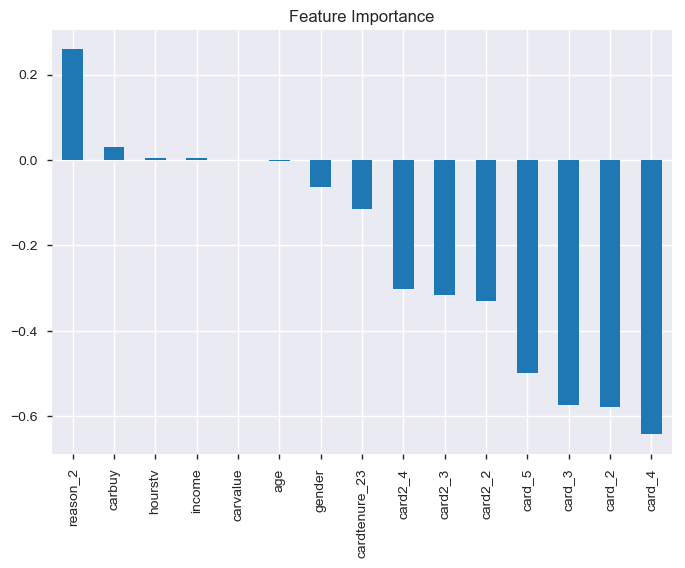

In [109]:
pd.Series(lm1.params,customer[feature_column1].columns).sort_values(ascending=False).plot(kind='bar',title='Feature Importance')

**Creating an excel file for  output - Prediction Output.xlsx**

In [110]:
writer = pd.ExcelWriter('Prediction Output.xlsx')

In [111]:
credit_final.to_excel(writer, "Prediction", index=True)
credit_final.to_csv("Prediction")

In [112]:
writer.save()

*******************************THE END***********************************